In [49]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
import torchmetrics
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from multiprocessing import cpu_count
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [50]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style="whitegrid", palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = (16, 10)


In [51]:
pl.seed_everything(42)

Seed set to 42


42

In [52]:
y_train =  pd.read_csv("dataset\\y_train.csv")
X_train = pd.read_csv("dataset\\X_train.csv")

In [53]:
X_train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [54]:
y_train.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


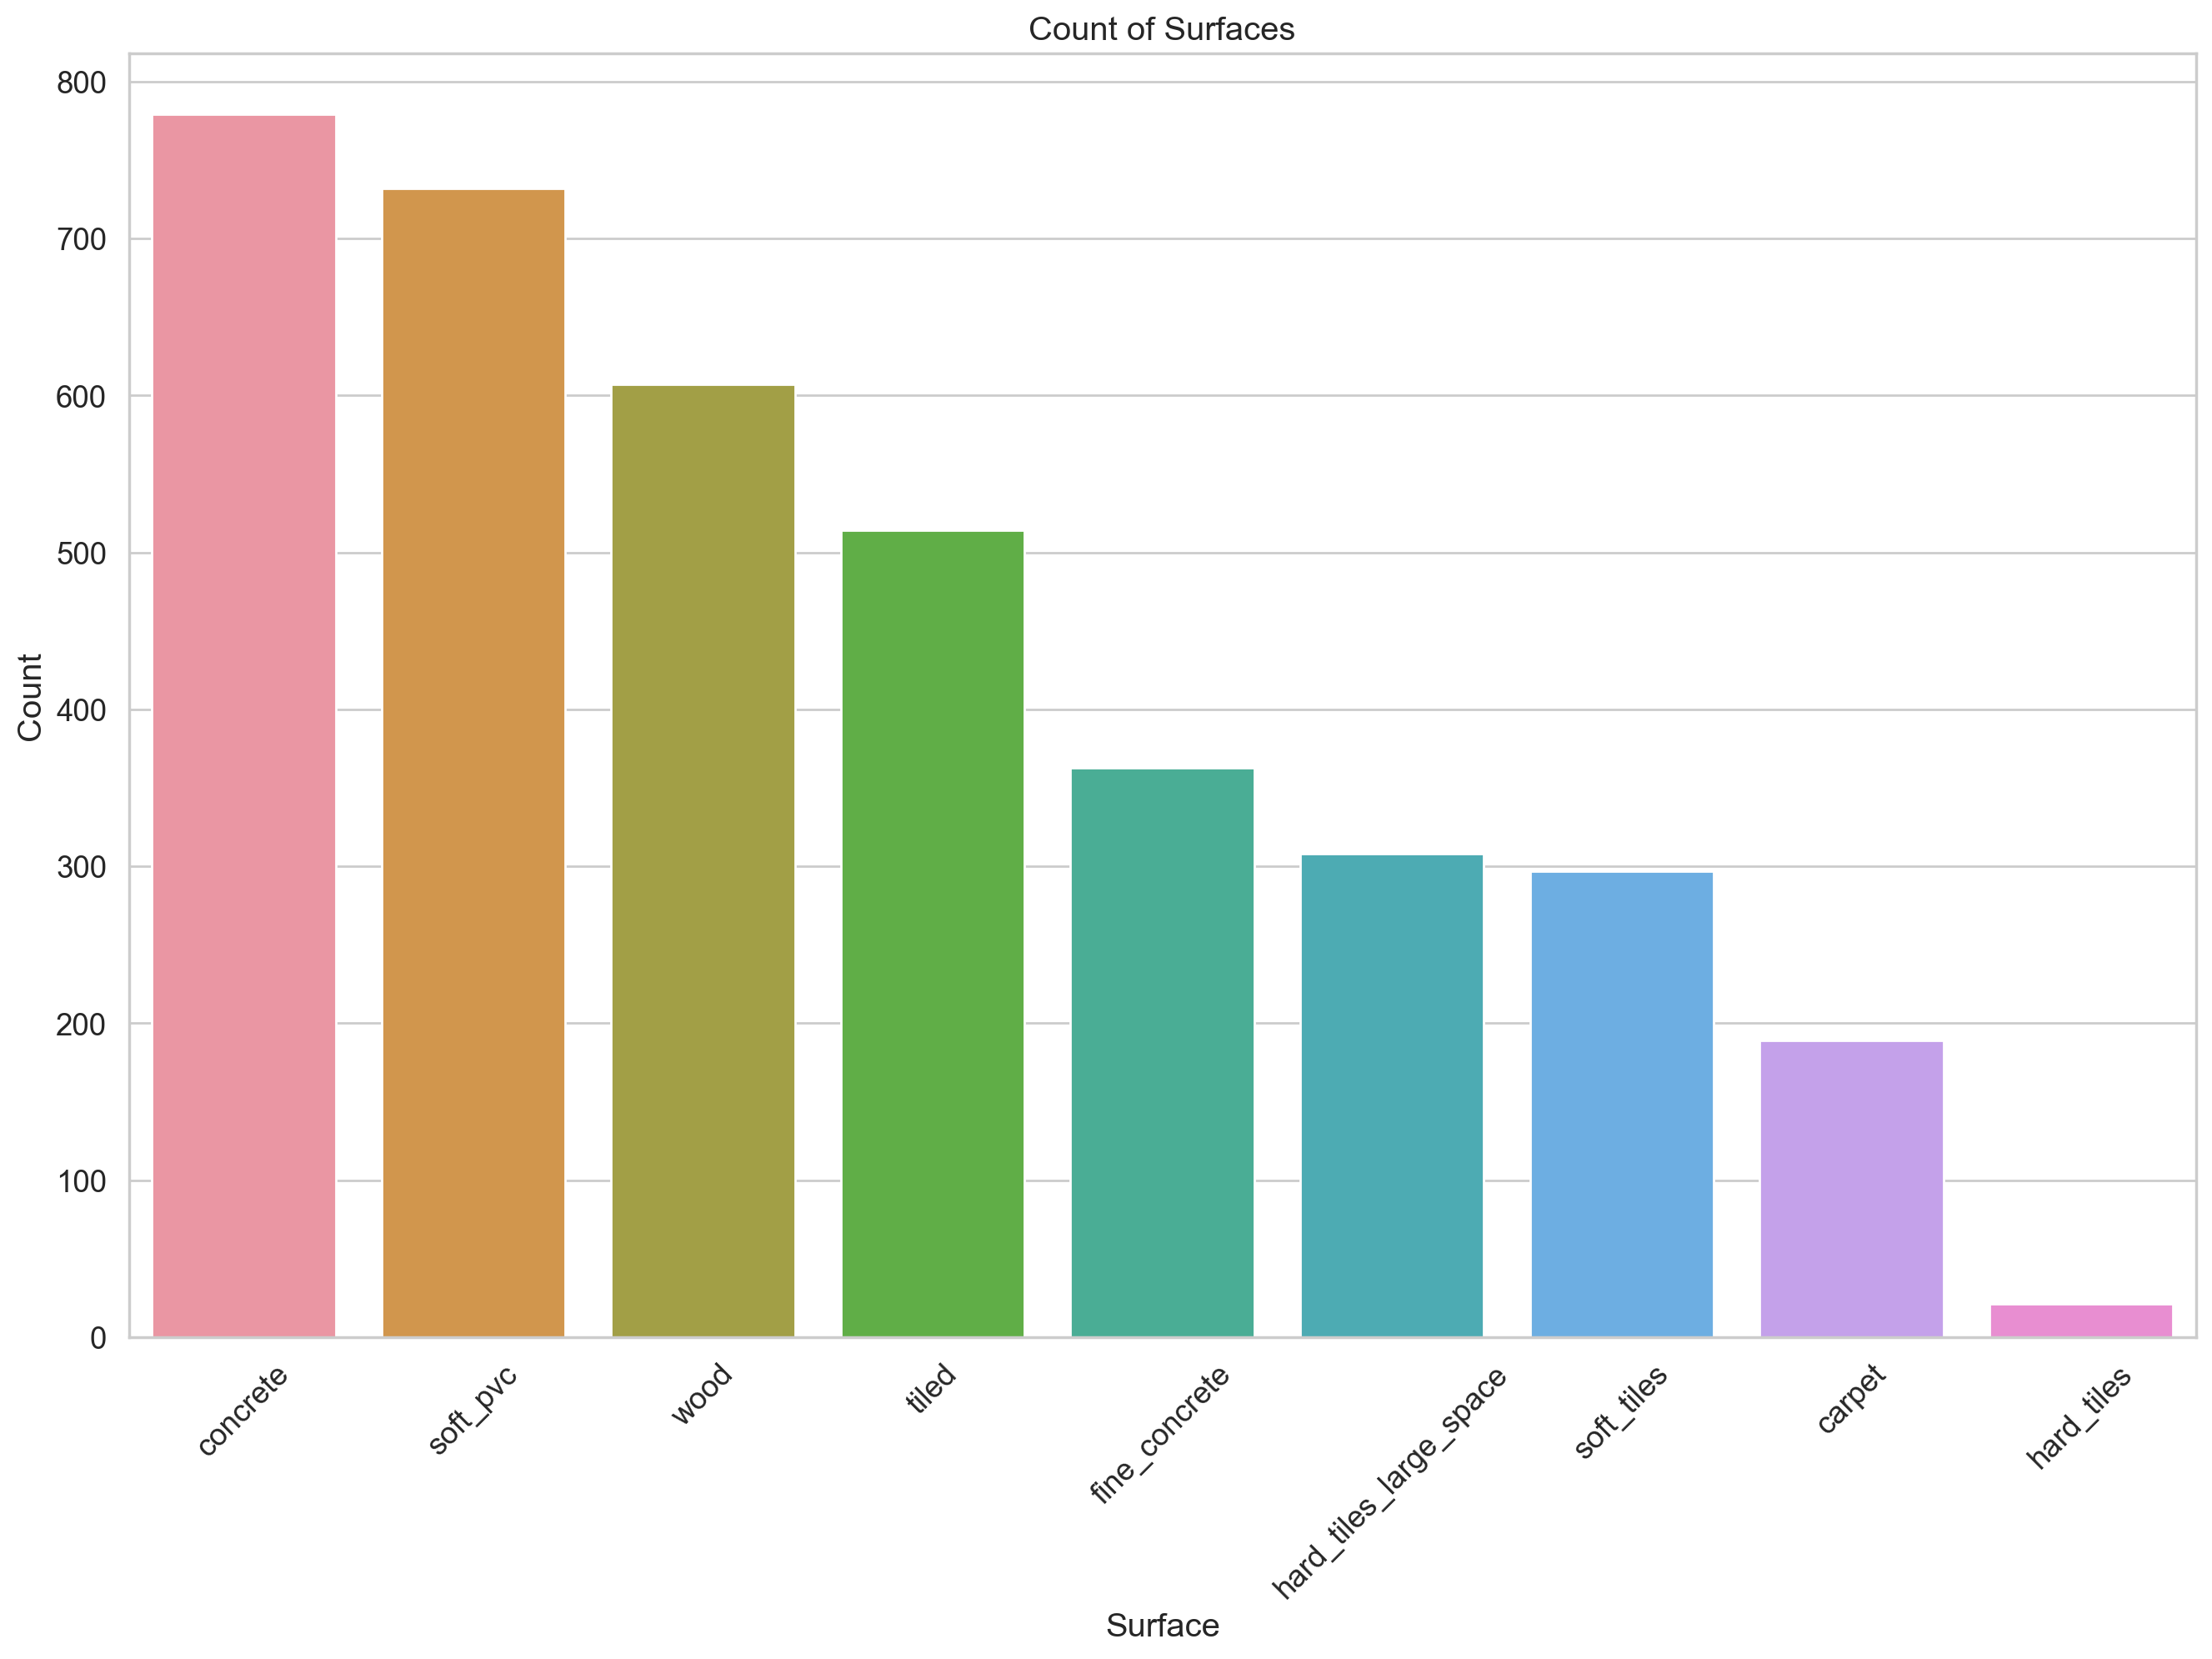

In [55]:
sns.countplot(data=y_train, x='surface', order=y_train['surface'].value_counts().index)
plt.xlabel('Surface')
plt.ylabel('Count')
plt.title('Count of Surfaces')
plt.xticks(rotation=45)
plt.show()


# preproessing

In [56]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the surface column
y_train['surface_encoded'] = label_encoder.fit_transform(y_train['surface'])

# Print the encoded labels
print(y_train.head())

   series_id  group_id        surface  surface_encoded
0          0        13  fine_concrete                2
1          1        31       concrete                1
2          2        20       concrete                1
3          3        31       concrete                1
4          4        22     soft_tiles                6


In [57]:
label_encoder.classes_

array(['carpet', 'concrete', 'fine_concrete', 'hard_tiles',
       'hard_tiles_large_space', 'soft_pvc', 'soft_tiles', 'tiled',
       'wood'], dtype=object)

In [58]:
X_train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [59]:
features_columns = X_train.columns[3:]
X_train.series_id.value_counts()


series_id
0       128
2544    128
2532    128
2533    128
2534    128
2535    128
2536    128
2537    128
2538    128
2539    128
2540    128
2541    128
2542    128
2543    128
2545    128
2530    128
2546    128
2547    128
2548    128
2549    128
2550    128
2551    128
2552    128
2553    128
2554    128
2555    128
2556    128
2557    128
2531    128
2529    128
2559    128
2514    128
2502    128
2503    128
2504    128
2505    128
2506    128
2507    128
2508    128
2509    128
2510    128
2511    128
2512    128
2513    128
2515    128
2528    128
2516    128
2517    128
2518    128
2519    128
2520    128
2521    128
2522    128
2523    128
2524    128
2525    128
2526    128
2527    128
2558    128
2560    128
2857    128
2604    128
2592    128
2593    128
2594    128
2595    128
2596    128
2597    128
2598    128
2599    128
2600    128
2601    128
2602    128
2603    128
2605    128
2590    128
2606    128
2607    128
2608    128
2609    128
2610    128
2611    128
2612  

In [60]:
y_train.head()

,series_id,group_id,surface,surface_encoded
0,0,13,fine_concrete,2
1,1,31,concrete,1
2,2,20,concrete,1
3,3,31,concrete,1
4,4,22,soft_tiles,6


In [61]:
(X_train.series_id.value_counts() == 128).sum() == len(y_train)

True

In [65]:
features_columns

Index(['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z'], dtype='object')

In [66]:
sequences = []
for series_id, group in X_train.groupby('series_id'):
    sequence = group[features_columns]
    label = y_train[y_train['series_id'] == series_id].iloc[0]['surface_encoded'] 
    sequences.append((sequence, label))

In [63]:
sequences[0]

(     orientation_X  orientation_Y  orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  linear_acceleration_Z
 0         -0.75853       -0.63435       -0.10488       -0.10597            0.107650            0.017561            0.000767              -0.748570               2.103000                -9.7532
 1         -0.75853       -0.63434       -0.10490       -0.10600            0.067851            0.029939            0.003386               0.339950               1.506400                -9.4128
 2         -0.75853       -0.63435       -0.10492       -0.10597            0.007275            0.028934           -0.005978              -0.264290               1.592200                -8.7267
 3         -0.75852       -0.63436       -0.10495       -0.10597           -0.013053            0.019448           -0.008974               0.426840               1.099300               -10.0960
 4         -0.75852       -0.6

In [68]:
train_sequences, test_sequences = train_test_split(sequences, test_size=0.2)
len(train_sequences), len(test_sequences)

(3048, 762)

#data set